In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})
df.head()

,beta,exponential,normal_p,normal_l
0,33.118766,6.921602,11.924759,12.051550
1,54.052126,1.145833,11.606625,23.568628
2,52.783147,2.787396,6.823516,0.522521
3,59.291382,2.808069,9.386367,-11.883086
4,45.333839,19.615409,9.313469,16.484706


In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

Trực quan hóa dữ liệu sinh ra

<AxesSubplot:ylabel='Density'>

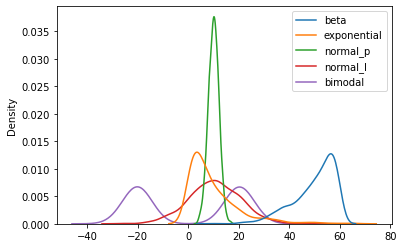

In [5]:
sns.kdeplot(data=df)

1. Thêm một đặc trưng với giá trị lớn hơn nhiều
Khi thêm đặc trưng này, do giá trị của chúng khác xa với khoảng giá trị ban đầu nên nếu ta biểu diễn bằng đồ thị thì các dữ liệu lúc trước sẽ co cụm lại 1 bên


<AxesSubplot:ylabel='Density'>

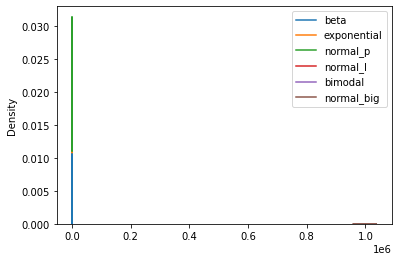

In [6]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)



<AxesSubplot:>

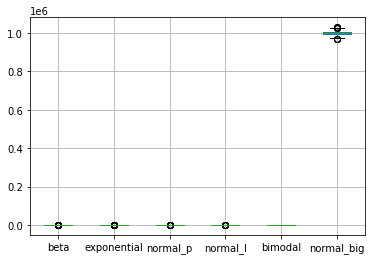

In [7]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [8]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-2.046032,-0.281019,0.916197,0.161831,0.979687,-0.177596
1,0.485901,-0.843006,0.762948,1.290866,0.906510,0.616828
2,0.332415,-0.683281,-1.541141,-0.968376,1.154971,-0.635603
3,1.119600,-0.681269,-0.306581,-2.184515,1.053887,-0.764863
4,-0.568594,0.954099,-0.341696,0.596419,0.738415,-0.952434


<AxesSubplot:ylabel='Density'>

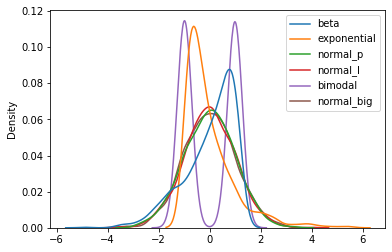

In [9]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<AxesSubplot:>

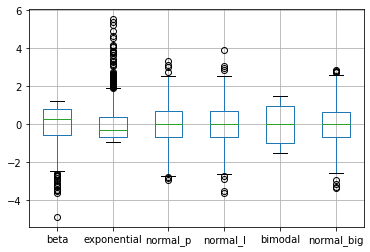

In [10]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [12]:
# lấy giá trị min của cột beta
df_s['beta'].min()
# lấy giá trị max của cột beta
df_s['beta'].max()

1.201996712789078

In [13]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[9.605073829322,
 0.007400039573244787,
 3.964346570478516,
 -26.4902318400205,
 -30.64387976388216,
 965963.2852896778]

In [14]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[-4.890060845419629,
 -0.9537768626155695,
 -2.9184411654617715,
 -3.6164736948301077,
 -1.4962223548073392,
 -3.357431104113426]

In [15]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.97261839779426,
 66.66008407378443,
 16.914145242976296,
 50.27629172440495,
 30.028046025965743,
 1029258.8458538865]

In [16]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.201996712789078,
 5.531584096422045,
 3.3196519468832224,
 3.9090553341147354,
 1.467988325095329,
 2.852857179248565]